<h1>Prosjektoppgave "Morse support" Marit Egner Python</h1>

<h2>Del a) Lese filen fra Excel til Python</h2>

In [69]:
import pandas as pd # importerer nødvendige pakker
import numpy as np

file = 'support_uke_24.xlsx' # filen som skal leses
data = pd.read_excel(file)

u_dag = data['Ukedag'].values
kl_slett = data['Klokkeslett'].values
varighet = data['Varighet'].values
score = data['Tilfredshet'].values

#Jeg testet at alle dataene var kommet over med print-test
#print(u_dag)
# print(kl_slett)
# print(varighet)
# print(score) Merk! Der det mangler data sår det 'nan'

# print(type(u_dag)) # Jeg sjekker at formatet er arrays, og det er "numpy.ndarray", som bør fungere fint


<h2>Del b) Antall henvendelser for hver ukedag med søylediagram</h2>

Mandag : 51
Tirsdag : 44
Onsdag : 45
Torsdag : 35
Fredag : 42
[dict_values([51, 44, 45, 35, 42])]


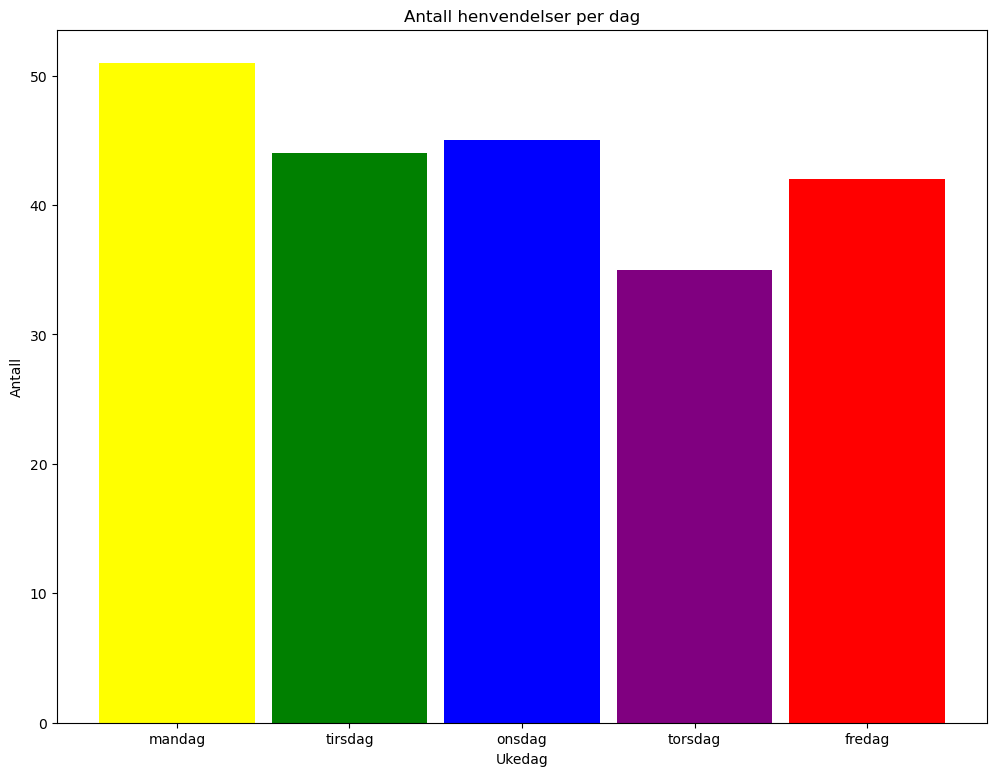

In [11]:
#Skriv et program som finner antall henvendelser for hver de 5 ukedagene. Resultatet visualiseres ved bruk av et søylediagram (stolpediagram).
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = 'support_uke_24.xlsx' # filen som skal leses

data = pd.read_excel(file) # dataene fra excel-filen
u_dag = data['Ukedag'].values # array med ukedagene fra excelfilen
dag = ['mandag', 'tirsdag', 'onsdag', 'torsdag', 'fredag'] # definerer en liste med de aktuelle ukedagene jeg skal se etter

antall = {d: np.sum(u_dag == d) for d in u_dag} # En bolsk array som sjekker om hvert element fra u_dag er utvalgt dag (True/False) lært fra KI

for d, count in antall.items(): # En forløkke som teller antall forekomster av hver dag og gir par av nøkkel og verdi (d er dag og count er forekomster)
    print(d,':', count) # svaret på antall henvendelser per dag

# Så skal jeg lage et søylediagram

dag = ['mandag', 'tirsdag', 'onsdag', 'torsdag', 'fredag']
#antall = [{d: np.sum(u_dag == d) for d in dag}] # Her er dette en dictionary som ikke kan brukes til et diagram

verdier = [dict.values(antall)] # Liste med verdiene fra dictionaryen antall
print(verdier) # print test

# Jeg fikk ikke til å overføre dictionaryen min til et format som jeg kunne bruke til søylediagrammet, så jeg laget en ny liste med de faktiske verdiene

henvendelser = [51, 44, 45, 35, 42]

plt.figure(1, figsize=(12,9))

plt.bar(dag, henvendelser, width=0.9, color=('yellow', 'green', 'blue', 'purple', 'red')) # variabler pluss definerer utseende

#plt.ylim(0, max(verdier) + 5) # Tilpasser området for verdiene på y-aksen

plt.title('Antall henvendelser per dag')
plt.xlabel('Ukedag')
plt.ylabel('Antall') 

plt.savefig('diagram_henvendelser.pdf')
plt.show()


<h2>Del C Minste og lengste samtaletid</h2>

In [21]:
#Del c) Skriv et program som finner minste og lengste samtaletid som er loggført for uke 24.
#Svaret skrives til skjerm med informativ tekst. 

import pandas as pd # importerer nødvendige pakker
import numpy as np

file = 'support_uke_24.xlsx' # filen som skal leses
data = pd.read_excel(file)

u_dag = data['Ukedag'].values
kl_slett = data['Klokkeslett'].values
varighet = data['Varighet'].values
score = data['Tilfredshet'].values

Minste_varighet = min(varighet)
print('Minste varighet på en supportsamtale i uke 24 var:', Minste_varighet, 'på formatet tt:mm:ss.')

Lengste_varighet = max(varighet)
print('Lengste varighet på en supportsamtale i uke 24  var:',Lengste_varighet, 'på formatet tt:mm:ss.') 

#Logisk test: Det virker rimelig at minste varighet er et svært lite tall og lengste er et stort tall

Minste varighet på en supportsamtale i uke 24 var: 00:00:59 på formatet tt:mm:ss.
Lengste varighet på en supportsamtale i uke 24  var: 00:11:28 på formatet tt:mm:ss.


<h2>Del D Gjennomsnittlig samtaletid</h2>

In [45]:
#Del d) KREVENDE: Skriv et program som regner ut gjennomsnittlig samtaletid basert på alle
#henvendelser i uke 24.
import pandas as pd # importerer nødvendige pakker
import numpy as np

file = 'support_uke_24.xlsx' # filen som skal leses
data = pd.read_excel(file)

#varighet = data['Varighet'].values

if 'Varighet' in data.columns: # Ser etter om det finnes en kolonne med navnet Varighet
    def tid_til_sekunder(tid):
        try:
            h,m,s = map(int, tid.split(':'))
            return h*3600 + m*60 + s
        except ValueError:
            return None # Gir None hvis det er feil format
    data['varighet_i_sekunder'] = data['Varighet'].apply(tid_til_sekunder)#Bruker funksjonen for å gjøre om til sekunder på kolonnen 'Varighet'
    data = data.dropna(subset = ['varighet_i_sekunder'])
    Gjennomsnitt_varighet = data['varighet_i_sekunder'].mean() # Beregner gj.snitt. antall sekunder
    print('Antall sekunder:',Gjennomsnitt_varighet) # printtest antall sekunder

    def sekunder_til_tid(sek):
        h = sek // 3600 # Finner antall hele timer
        m = (sek % 3600) // 60 # bruker modulus og rest til å finne antall minutter
        s = sek % 60 # bruker modulus til å gi antall resterende sek
        return f'{int(h):02}:{int(m):02}:{int(s):02}'
    gjennomsnitt_tid = sekunder_til_tid(Gjennomsnitt_varighet)
    print(f'Gjennomsnittlig varighet på samtalene var: {gjennomsnitt_tid}')

#Logisk test: Det virker rimelig at gjennomsnittslengden er omtrent midt i mellom korteste og lengste taletid fra forrige oppgave

Antall sekunder: 400.00921658986175
Gjennomsnittlig varighet på samtalene var: 00:06:40


<h2>Del E Fordeling av henvendelser gjennom dagen</h2>

In [71]:
'''
Del e) Supportvaktene i MORSE er delt inn i 2-timers bolker: kl 08-10, kl 10-12, kl 12-14 og kl
14-16. Skriv et program som finner det totale antall henvendelser supportavdelingen mottok
for hver av tidsrommene 08-10, 10-12, 12-14 og 14-16 for uke 24. Resultatet visualiseres ved
bruk av et sektordiagram (kakediagram).
'''
# Jeg vil bruke arrayen kl_slett og finne antall som plasserer seg i hvert intervall, uavhengig av dag.



'\nDel e) Supportvaktene i MORSE er delt inn i 2-timers bolker: kl 08-10, kl 10-12, kl 12-14 og kl\n14-16. Skriv et program som finner det totale antall henvendelser supportavdelingen mottok\nfor hver av tidsrommene 08-10, 10-12, 12-14 og 14-16 for uke 24. Resultatet visualiseres ved\nbruk av et sektordiagram (kakediagram).\n'

Antall henvendelser i absolutte tall:
Antall henvendelser kl 08:00–10:00: 98
Antall henvendelser kl 10:00–12:00: 40
Antall henvendelser kl 12:00–14:00: 45
Antall henvendelser kl 14:00–16:00: 34


C:\Users\mareg\AppData\Local\Temp\ipykernel_22512\2735289199.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Klokkeslett'] = pd.to_datetime(data['Klokkeslett']).dt.time # Gjør om til tidsobjekter


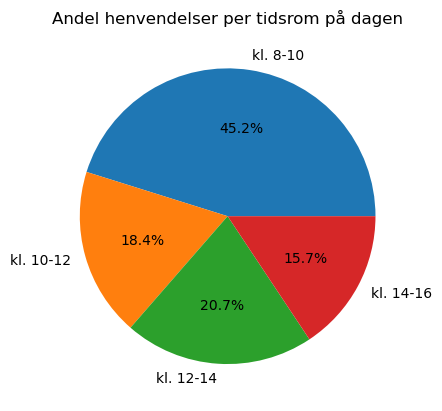

In [121]:
import pandas as pd # importerer nødvendige pakker
import numpy as np
from datetime import time
import matplotlib.pyplot as plt

file = 'support_uke_24.xlsx' # filen som skal leses
data = pd.read_excel(file)

kl_slett = data['Klokkeslett'].values
#print(kl_slett)  Tester at jeg har tilgang på alle klokkeslettene

data['Klokkeslett'] = pd.to_datetime(data['Klokkeslett']).dt.time # Gjør om til tidsobjekter
#print(data) #Tester at jeg får ut tidsobjektene

# definerer tidsintervaller:
tidsintervaller = [
    (time(8,0), time(10,0)),
    (time(10,0), time(12,0)),
    (time(12,0), time(14,0)),
    (time(14,0), time(16,0))
]
# Jeg går gjennom alle henvendlesene og sorterer i de definerte tidsrommene
print('Antall henvendelser i absolutte tall:')
for start, slutt in tidsintervaller:
    antall_henvendelser = len(data[(data['Klokkeslett'] >= start) & (data['Klokkeslett'] < slutt)]) # finner antall forekomster med bruk av len
    print(f"Antall henvendelser kl {start.strftime('%H:%M')}–{slutt.strftime('%H:%M')}: {antall_henvendelser}") # skriver ut liste med antall henvendelser

# So far, so good. Jeg får skrevet ut en liste over antall henvendelser i hver periode. For å lage diagrammet bruker jeg bare verdiene, som i del B. 

antall_henvendelser = [98,40,45,34]
Tidsrom = ('kl. 8-10', 'kl. 10-12', 'kl. 12-14', 'kl. 14-16')

plt.pie(antall_henvendelser, labels = Tidsrom, autopct = '%1.1f%%') # Beskriver sektordiagrammmetmed variabel og bruk av prosent

plt.title('Andel henvendelser per tidsrom på dagen') # Gir tittel

plt.savefig('pie_henvendelser.pdf') # Lagrer diagrmmet
plt.show() # Viser diagrammet

# Oppgaven ber om totalt antall, men jeg synes det er bedre å visualisere med prosent i kakediagrammet. Jeg har derfor valgt å oppgi begge.
# Logisk test: andel og absolutte tall virker rimelige i forhold til hverandre

<h2>Del F Kundetilfredshet</h2>

In [127]:
#Lag et program som regner ut supportavdelings NPS og skriver svaret til skjerm. 
#Merk: Kunder som ikke har gitt tilbakemelding på tilfredshet, skal utelates fra utregningene

import pandas as pd # importerer nødvendige pakker
import numpy as np

file = 'support_uke_24.xlsx' # filen som skal leses
data = pd.read_excel(file)

besvart_score = data['Tilfredshet'].dropna().values # Med dropna() fjerner jeg alle som ikke har svart
#print(besvart_score) #printtest for å se at nan er borte

negativ = np.sum((1 <= besvart_score) & (besvart_score <= 6)) # Antall forekomster i intervall 1-6 som er negative
noytral = np.sum((7 <= besvart_score) & (besvart_score <= 8)) # Antall forekomster i intervall 7-8 som er nøytrale
positiv = np.sum((9<= besvart_score) & (besvart_score <= 10)) # Antall forekomster i intervall 9-10 som er positive
total_svar = len(data['Tilfredshet'].dropna().values) # Teller totalt antall svar
#print(negativ)
#print(noytral)
#print(positiv)
#print(total_svar) # Test: Totalt antall svar stemmer med summen av de tre kategoriene

#Net promoter score forkortes (NPS)

prosent_negativ = (negativ / total_svar)*100 # Gjør om svarene til prosent
prosent_positiv = (positiv / total_svar)*100
#print(prosent_negativ, prosent_positiv)
NPS = round((prosent_positiv - prosent_negativ),1) # Har fått oppgitt formel NPS = %positive - %negative for å finne NPS og har rundet av svaret
print('Net Promoter Score (NPS) for firmaet MORSE er', NPS)
# Logisk test: Svaret mitt er i omtrent i samme område som eksempelet, og virker riktig ut fra antall og andel negative og positive

23.25581395348837 65.11627906976744
Net Promoter Score (NPS) for firmaet MORSE er 41.9
